# Statistical analysis of benchmarking results
We executed a two ppure ImageJ macros and two more macros using CLIJ and saved execution times as ImageJ-xls file. We performed these experiment on four test computers with this specified CPU/GPU hardware:

 1. Intel i5-8265U CPU/ Intel UHD 620 integrated GPU
 2. Intel i7-8750H CPU/ NVidia Geforce 2080 Ti RTX external GPU
 3. AMD Ryzen 4700U CPU/ AMD Vega 7 integrated GPU
 4. Intel i7-7920HQ CPU/ AMD Radeon Pro 560 dedicated GPU

This notebook serves summarizing these xls files.

In [1]:
import numpy as np
import pandas as pd

folder1 = "benchmarking_ulice"
folder2 = "benchmarking_perlis"
folder3 = "benchmarking_hopper"
folder4 = "benchmarking_dani"

workflow_W_IJ = "original_analyis_0.xls"
workflow_W_CLIJ = "clij_analyis_0.xls"
workflow_W_OPT_IJ = "original_opti_analysis_0.xls"
workflow_W_OPT_CLIJ= "clij_opti_analyis_0.xls"

# convenience function for reading the data
def load_data(filename):
    data = pd.read_csv(filename, delimiter='\t')
    
    # today, we only look at the mean intensity over time
    return data["Mean"]

data1a = load_data("../" + folder1 + "/" + workflow_W_IJ)
data2a = load_data("../" + folder2 + "/" + workflow_W_IJ)
data3a = load_data("../" + folder3 + "/" + workflow_W_IJ)
data4a = load_data("../" + folder4 + "/" + workflow_W_IJ)

data1b = load_data("../" + folder1 + "/" + workflow_W_CLIJ)
data2b = load_data("../" + folder2 + "/" + workflow_W_CLIJ)
data3b = load_data("../" + folder3 + "/" + workflow_W_CLIJ)
data4b = load_data("../" + folder4 + "/" + workflow_W_CLIJ)

data1c = load_data("../" + folder1 + "/" + workflow_W_OPT_IJ)
data2c = load_data("../" + folder2 + "/" + workflow_W_OPT_IJ)
data3c = load_data("../" + folder3 + "/" + workflow_W_OPT_IJ)
data4c = load_data("../" + folder4 + "/" + workflow_W_OPT_IJ)

data1d = load_data("../" + folder1 + "/" + workflow_W_OPT_CLIJ)
data2d = load_data("../" + folder2 + "/" + workflow_W_OPT_CLIJ)
data3d = load_data("../" + folder3 + "/" + workflow_W_OPT_CLIJ)
data4d = load_data("../" + folder4 + "/" + workflow_W_OPT_CLIJ)


## Getting a first look: Inspecting mean and standard deviation of intensity measurements

In [2]:
# comparison of means
means = [
    [
        str(round(np.mean(data1a),2)) + " $\pm$ " + str(round(np.std(data1a),2)),
        str(round(np.mean(data2a),2)) + " $\pm$ " + str(round(np.std(data2a),2)),
        str(round(np.mean(data3a),2)) + " $\pm$ " + str(round(np.std(data3a),2)),
        str(round(np.mean(data4a),2)) + " $\pm$ " + str(round(np.std(data4a),2))
    ],[
        str(round(np.mean(data1b),2)) + " $\pm$ " + str(round(np.std(data1b),2)),
        str(round(np.mean(data2b),2)) + " $\pm$ " + str(round(np.std(data2b),2)),
        str(round(np.mean(data3b),2)) + " $\pm$ " + str(round(np.std(data3b),2)),
        str(round(np.mean(data4b),2)) + " $\pm$ " + str(round(np.std(data4b),2))
    ],[
        str(round(np.mean(data1c),2)) + " $\pm$ " + str(round(np.std(data1c),2)),
        str(round(np.mean(data2c),2)) + " $\pm$ " + str(round(np.std(data2c),2)),
        str(round(np.mean(data3c),2)) + " $\pm$ " + str(round(np.std(data3c),2)),
        str(round(np.mean(data4c),2)) + " $\pm$ " + str(round(np.std(data4c),2))
    ],[
        str(round(np.mean(data1d),2)) + " $\pm$ " + str(round(np.std(data1d),2)),
        str(round(np.mean(data2d),2)) + " $\pm$ " + str(round(np.std(data2d),2)),
        str(round(np.mean(data3d),2)) + " $\pm$ " + str(round(np.std(data3d),2)),
        str(round(np.mean(data4d),2)) + " $\pm$ " + str(round(np.std(data4d),2))
    ]
]

pd.DataFrame(means)

,0,1,2,3
0,47.72 $\pm$ 3.85,47.72 $\pm$ 3.85,47.72 $\pm$ 3.85,47.72 $\pm$ 3.85
1,47.39 $\pm$ 3.64,47.39 $\pm$ 3.64,47.74 $\pm$ 3.89,47.74 $\pm$ 3.89
2,46.19 $\pm$ 3.9,46.19 $\pm$ 3.9,46.19 $\pm$ 3.9,46.19 $\pm$ 3.9
3,46.64 $\pm$ 3.62,46.64 $\pm$ 3.62,47.01 $\pm$ 3.87,47.01 $\pm$ 3.87


## Latex export


In [3]:
def print_latex_table(vertical_header, results):
    for header, line in zip(vertical_header, results):
        output = header
        for i, column in enumerate(line):
            output = output + " & \n"
            output = output + str(column)
        output = output + "\\\\\n"
        print(output)
        
vertical_header = [
    "\\workflowA",
    "\\workflowB",
    "\\workflowC",
    "\\workflowD"
]

print_latex_table(vertical_header, means)

\workflowA & 
47.72 $\pm$ 3.85 & 
47.72 $\pm$ 3.85 & 
47.72 $\pm$ 3.85 & 
47.72 $\pm$ 3.85\\

\workflowB & 
47.39 $\pm$ 3.64 & 
47.39 $\pm$ 3.64 & 
47.74 $\pm$ 3.89 & 
47.74 $\pm$ 3.89\\

\workflowC & 
46.19 $\pm$ 3.9 & 
46.19 $\pm$ 3.9 & 
46.19 $\pm$ 3.9 & 
46.19 $\pm$ 3.9\\

\workflowD & 
46.64 $\pm$ 3.62 & 
46.64 $\pm$ 3.62 & 
47.01 $\pm$ 3.87 & 
47.01 $\pm$ 3.87\\



## Drawing scatter plots to visualize differences

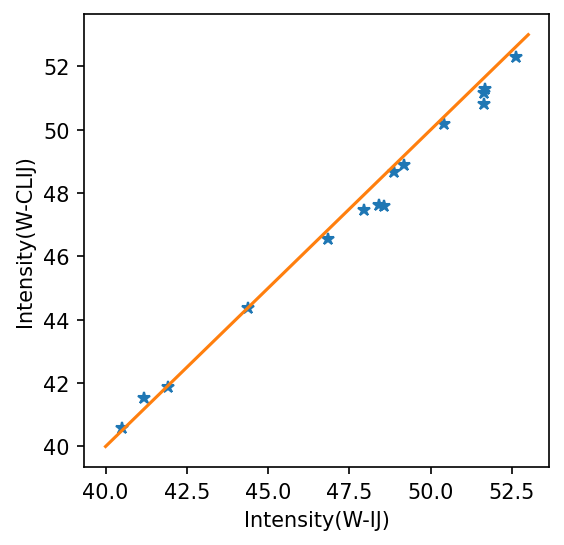

In [4]:
# scatter plot

import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4), dpi=150)
plt.plot(data1a, data1b, "*")
plt.plot([40, 53], [40, 53])
plt.xlabel("Intensity(W-IJ)");
plt.ylabel("Intensity(W-CLIJ)");
plt.savefig("../tex/fig/scatter_w_ij_versus_w_clij.pdf", dpi=150)
plt.show()


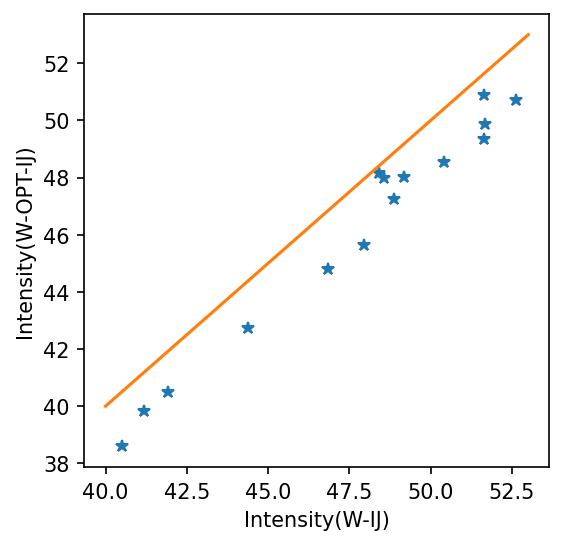

In [5]:
plt.figure(figsize=(4, 4), dpi=150)
plt.plot(data1a, data1c, "*")
plt.plot([40, 53], [40, 53])
plt.xlabel("Intensity(W-IJ)");
plt.ylabel("Intensity(W-OPT-IJ)");
plt.savefig("../tex/fig/scatter_w_ij_versus_w_opt_ij.pdf", dpi=150)
plt.show()

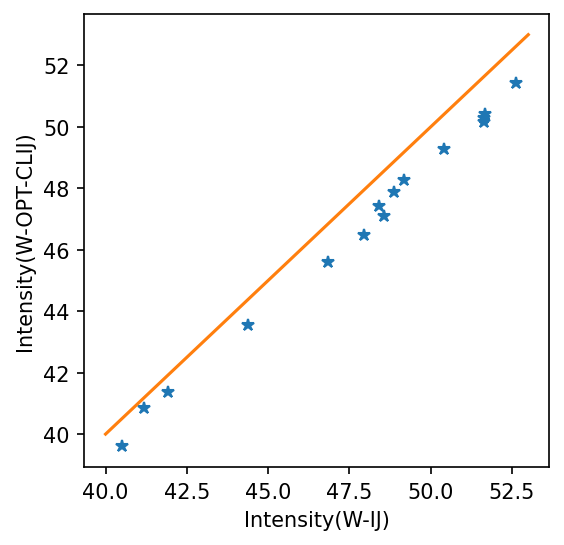

In [6]:
plt.figure(figsize=(4, 4), dpi=150)
plt.plot(data1a, data1d, "*")
plt.plot([40, 53], [40, 53])
plt.xlabel("Intensity(W-IJ)");
plt.ylabel("Intensity(W-OPT-CLIJ)");
plt.savefig("../tex/fig/scatter_w_ij_versus_w_opt_clij.pdf", dpi=150)
plt.show()

## Analysis of Pearson correlation

In [7]:
# linear correlation analysis: determine Pearson's r using scipy
from scipy import stats

print ("Peasons R for W_IJ versus W_CLIJ: " + str(stats.pearsonr(data1a, data1b)[0]))
print ("Peasons R for W_IJ versus W_OPT_IJ: " + str(stats.pearsonr(data1a, data1c)[0]))
print ("Peasons R for W_IJ versus W_OPT_CLIJ: " + str(stats.pearsonr(data1a, data1d)[0]))

Peasons R for W_IJ versus W_CLIJ: 0.9974851336378945
Peasons R for W_IJ versus W_OPT_IJ: 0.9885882599500648
Peasons R for W_IJ versus W_OPT_CLIJ: 0.9980760293646682


## Equivalence testing using two one-sided paired t-tests (TOST)

In [8]:
# Two-sided paired T-Tests
# acceptable tolerance of 5% of the mean
def equivalence_testing(A, B):
    average = np.mean([A, B])
    tolerance = 0.05 * average
    
    from statsmodels.stats.weightstats import ttost_paired

    print("A: " + str(np.mean(A)) + " +- " + str(np.std(A)))
    print("B: " + str(np.mean(B)) + " +- " + str(np.std(B)))
    
    print(ttost_paired(data1a, data1b, -tolerance, tolerance))

In [9]:
print("Original versus CLIJ")
equivalence_testing(data1a, data1b)

Original versus CLIJ
A: 47.7202 +- 3.8510342887766313
B: 47.3926 +- 3.6359650310016276
(1.1114248201067994e-12, (29.634413411092183, 2.470392339386257e-14, 14.0), (-22.45753600686376, 1.1114248201067994e-12, 14.0))


In [10]:
print("Original versus Original optimized")
equivalence_testing(data1a, data1c)

Original versus Original optimized
A: 47.7202 +- 3.8510342887766313
B: 46.193000000000005 +- 3.9011582211782523
(1.3588554357310017e-12, (29.305911345535385, 2.8809333936039876e-14, 14.0), (-22.12903394130696, 1.3588554357310017e-12, 14.0))


In [11]:
print("CLIJ versus CLIJ optimized")
equivalence_testing(data1b, data1d)

CLIJ versus CLIJ optimized
A: 47.3926 +- 3.6359650310016276
B: 46.64419999999999 +- 3.6190338158132755
(1.3308296505282611e-12, (29.339758340619436, 2.8354397970199486e-14, 14.0), (-22.162880936391012, 1.3308296505282611e-12, 14.0))


## Bland-Altman analysis / plots

In [12]:
# A function for drawing Bland-Altman plots
# source https://stackoverflow.com/questions/16399279/bland-altman-plot-in-python
import matplotlib.pyplot as plt
import numpy as np

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    
    plt.figure(figsize=(5, 4), dpi=180)
    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

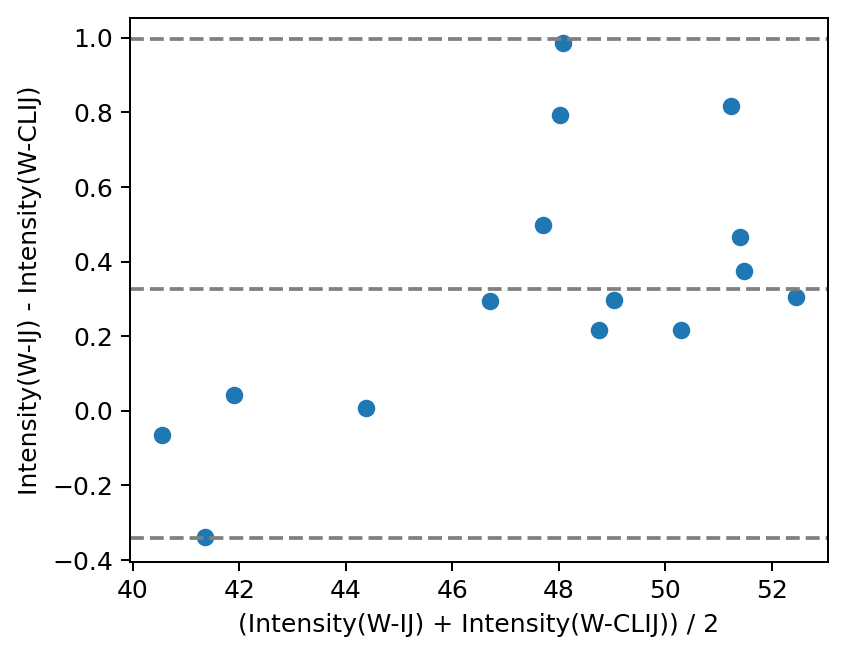

In [13]:
# draw a Bland-Altman plot: compare original versus clij
bland_altman_plot(data1a, data1b)
plt.xlabel("(Intensity(W-IJ) + Intensity(W-CLIJ)) / 2");
plt.ylabel("Intensity(W-IJ) - Intensity(W-CLIJ)");
plt.savefig("../tex/fig/bland_altman_w_ij_versus_w_clij.pdf", dpi=150)
plt.show()


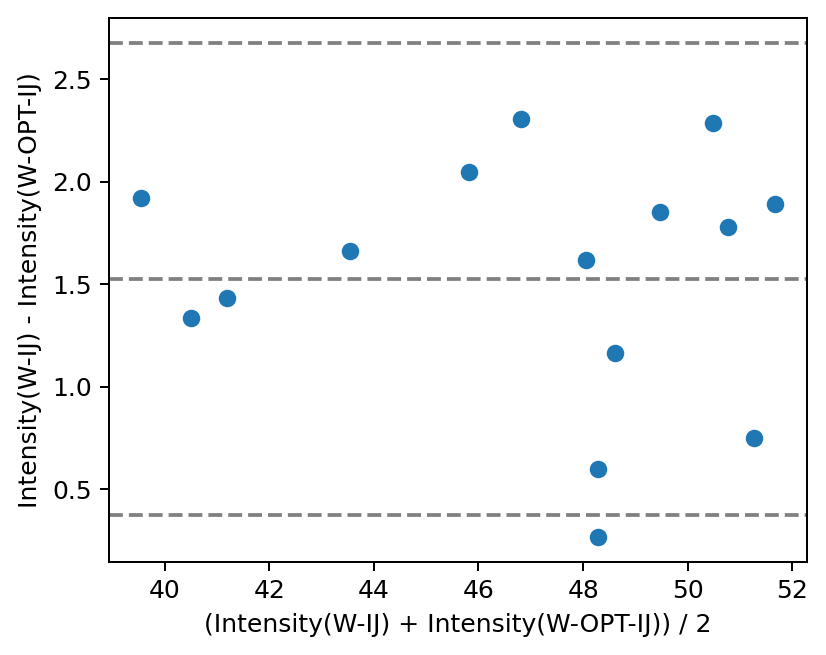

In [14]:
# draw a Bland-Altman plot: compare original versus optimized
bland_altman_plot(data1a, data1c)
plt.xlabel("(Intensity(W-IJ) + Intensity(W-OPT-IJ)) / 2");
plt.ylabel("Intensity(W-IJ) - Intensity(W-OPT-IJ)");
plt.savefig("../tex/fig/bland_altman_w_ij_versus_w_opt_ij.pdf", dpi=150)
plt.show()

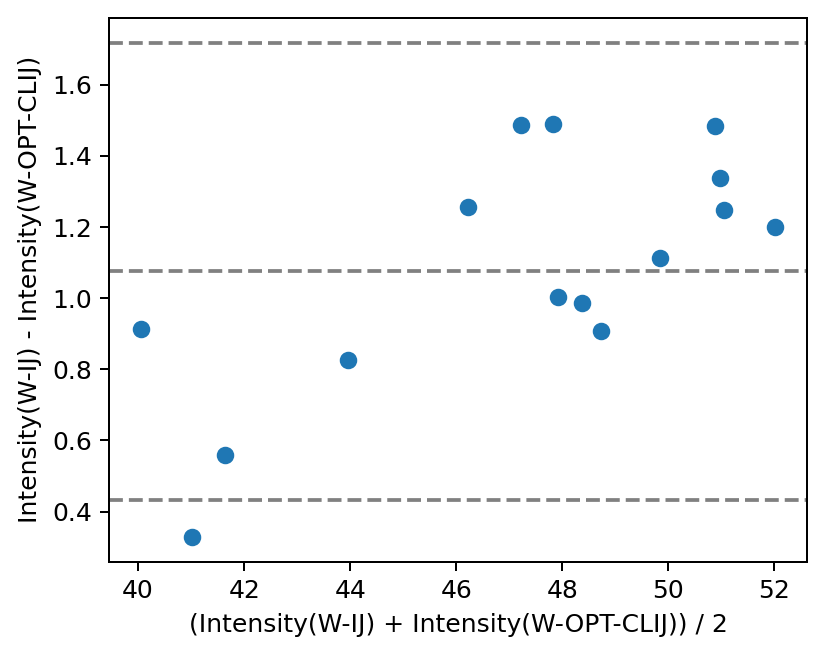

In [15]:
# draw a Bland-Altman plot: compare original versus optimized clij
bland_altman_plot(data1a, data1d)
plt.xlabel("(Intensity(W-IJ) + Intensity(W-OPT-CLIJ)) / 2");
plt.ylabel("Intensity(W-IJ) - Intensity(W-OPT-CLIJ)");
plt.savefig("../tex/fig/bland_altman_w_ij_versus_w_opt_clij.pdf", dpi=150)
plt.show()